<a href="https://colab.research.google.com/github/solar-node/ML/blob/main/IISCtask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

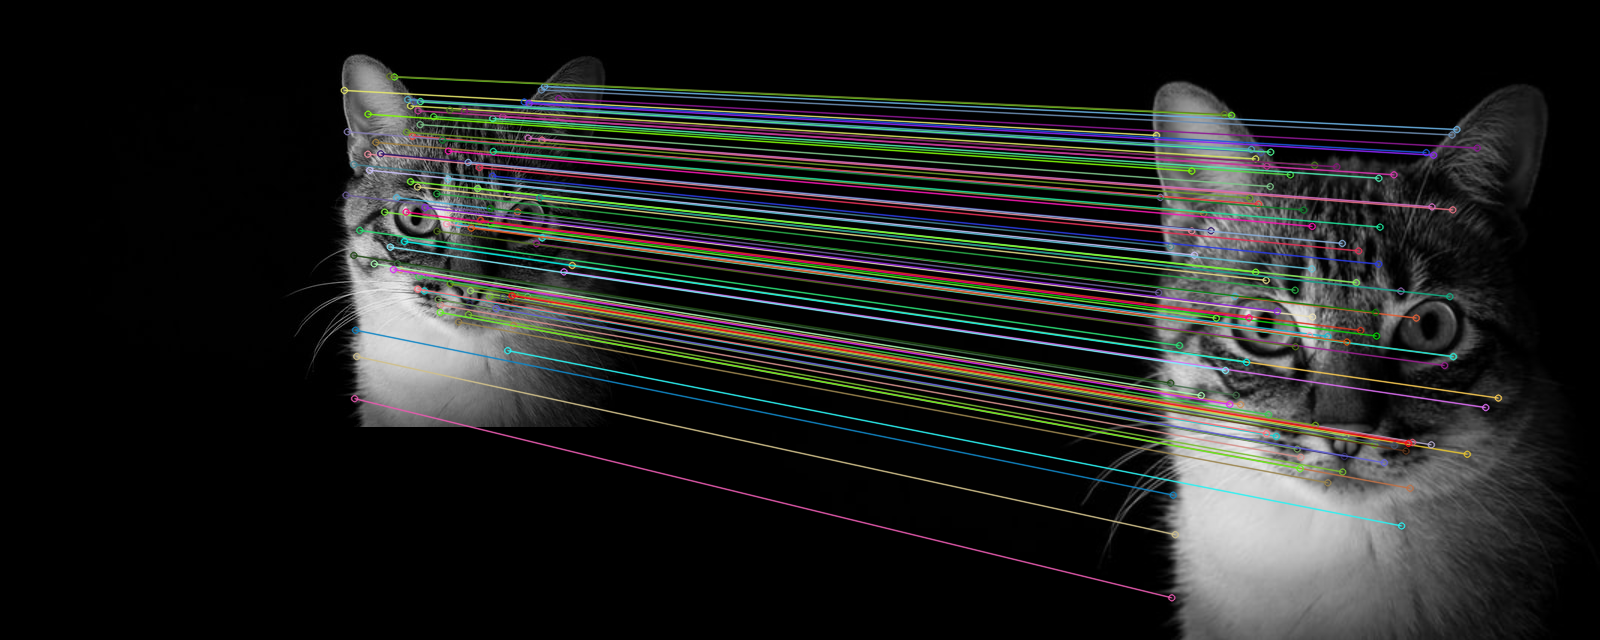

True

In [31]:
# Link for images :
# https://drive.google.com/file/d/1ZwFcN1TISeGmFzd2V9XfnqghgXlZXb2f/view?usp=drive_link
# https://drive.google.com/file/d/1nDVJVMo6r9pWwmGinOVV5-GDt9ktXOfC/view?usp=drive_link
# https://drive.google.com/file/d/1Sgy4gGlNrlNvyAn6le6vO2kFFg4Mp6ra/view?usp=drive_link


import cv2
import numpy as np
from google.colab.patches import cv2_imshow


# Reading
img1 = cv2.imread('cat.jpg')

# Scaling :
img1_scale = cv2.resize(img1, None, fx = 1.5, fy = 1.5, interpolation = cv2.INTER_LINEAR )


# Making both images Grayscale
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img1_scale = cv2.cvtColor(img1_scale, cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
s_keypoints1, s_descriptors1 = sift.detectAndCompute(img1, None)
s_keypoints2, s_descriptors2 = sift.detectAndCompute(img1_scale, None)

# Match descriptors with bf matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(s_descriptors1, s_descriptors2)

# Sorting by distance:
matches_s = sorted(matches, key = lambda x : x.distance)

# Drawing the matches :
matches_draw = cv2.drawMatches(img1, s_keypoints1, img1_scale, s_keypoints2, matches_s[:100], None, flags = cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS )

# Display image :
cv2_imshow (matches_draw)

# Saving image
cv2.imwrite('/content/scale_cat.jpg', matches_draw)




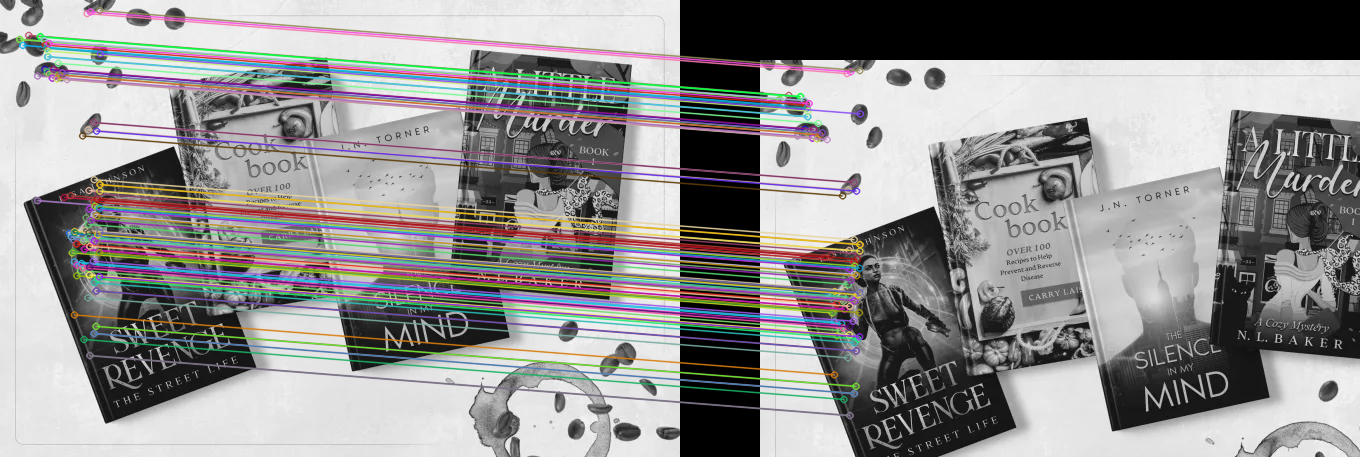

True

In [32]:

img2 = cv2.imread('books2.webp')

# Translation :
matrix2 = np.float32([[1,0,80],[0,1,60]])

img2_trans = cv2.warpAffine(img2, matrix2, (img2.shape[1], img2.shape[0]))  #Shift right by 80 and down by 60

img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img2_trans = cv2.cvtColor(img2_trans, cv2.COLOR_BGR2GRAY)


t_keypoints1, t_descriptors1 = sift.detectAndCompute(img2, None)
t_keypoints2, t_descriptors2 = sift.detectAndCompute(img2_trans, None)

bf = cv2.BFMatcher(cv2.NORM_L2)
matches2 = bf.match(t_descriptors1, t_descriptors2)
matches2_s = sorted(matches2, key = lambda x : x.distance)
matches2_draw = cv2.drawMatches(img2, t_keypoints1, img2_trans, t_keypoints2, matches2_s[:100], None, flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

cv2_imshow(matches2_draw)
cv2.imwrite('/content/trns_book.jpg',matches2_draw )


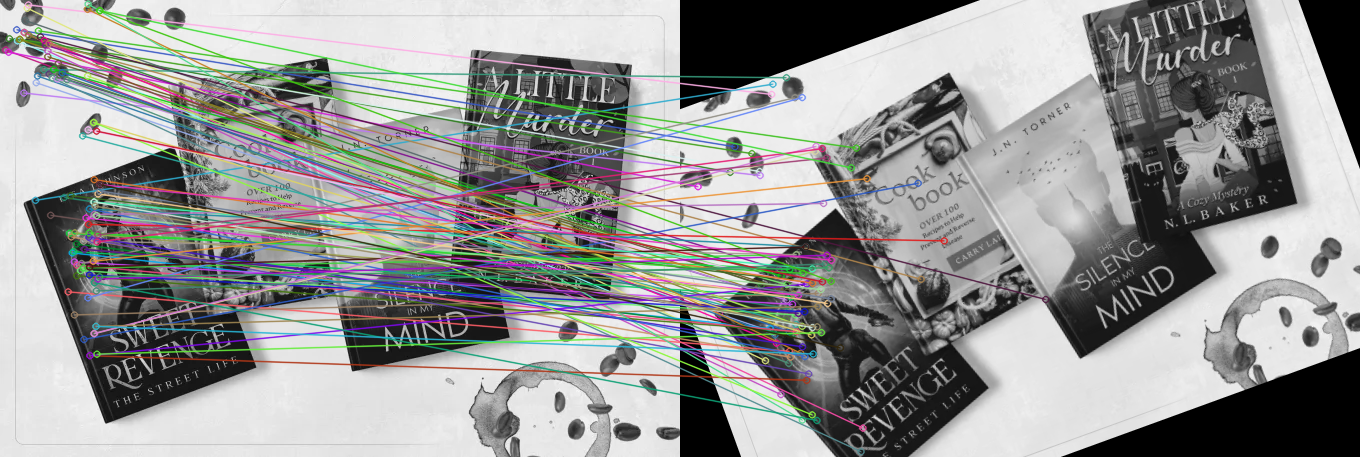

True

In [33]:
img3 = cv2.imread('books2.webp')

# Rotation
h,w = img3.shape[:2]
matrix3 = cv2.getRotationMatrix2D((w/2,h/2),20,1)
img3_rot = cv2.warpAffine(img3,matrix3,(w,h))

img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
img3_rot = cv2.cvtColor(img3_rot, cv2.COLOR_BGR2GRAY)


r_keypoints1, r_descriptors1 = sift.detectAndCompute(img3, None)
r_keypoints2, r_descriptors2 = sift.detectAndCompute(img3_rot, None)

bf = cv2.BFMatcher(cv2.NORM_L2)
matches3 = bf.match(r_descriptors1, r_descriptors2)

matches3_s = sorted(matches3, key = lambda x:x.distance)
matches3_draw = cv2.drawMatches(img3, r_keypoints1, img3_rot, r_keypoints2, matches[:100], None, flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

cv2_imshow(matches3_draw)
cv2.imwrite('/content/rot_books2.jpg',matches3_draw)


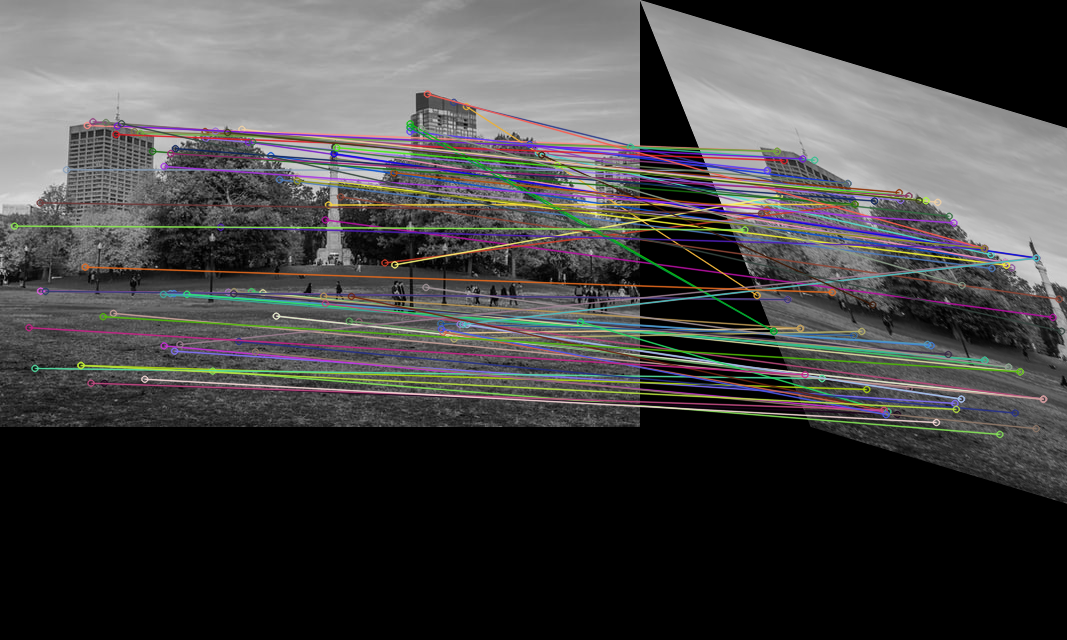

True

In [34]:
img4 = cv2.imread('park.jpg')

# Shear :
h, w = img4.shape[:2]

# Shearing parameters:
a=0.4
b=0.3

matrix4 = np.float32([[1,a,0],
                     [b,1,0]])

img4_shear = cv2.warpAffine(img4, matrix4, (h,w))

img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)
img4_shear = cv2.cvtColor(img4_shear, cv2.COLOR_BGR2GRAY)

sh_keypoints1, sh_descriptors1 = sift.detectAndCompute(img4, None)
sh_keypoints2, sh_descriptors2 = sift.detectAndCompute(img4_shear, None)

bf = cv2.BFMatcher(cv2.NORM_L2)
matches4 = bf.match(sh_descriptors1, sh_descriptors2)

matches4_s = sorted(matches4, key = lambda x:x.distance)
matches4_draw = cv2.drawMatches(img4, sh_keypoints1, img4_shear, sh_keypoints2, matches4_s[:100], None, flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

cv2_imshow(matches4_draw)
cv2.imwrite('/content/shear_park.jpg', matches4_draw)